In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-buyers/bike_buyers_clean.csv
/kaggle/input/bike-buyers/bike_buyers.csv


In [2]:
bikeBuyers= pd.read_csv("../input/bike-buyers/bike_buyers.csv")
bikeBuyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [3]:
bikeBuyers.shape

(1000, 13)

In [4]:
bikeBuyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


# Missing Values

In [5]:
missingValues=bikeBuyers.isna().sum()
print(missingValues)

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [6]:
total_cells= np.product(bikeBuyers.shape)
total_missing=missingValues.sum()
#percentage of missing values
percent=round((total_missing/total_cells)*100,2)
print (percent,'%')

0.41 %


In [7]:
#now we will calculate the percentage of missing values for each column
round((missingValues/len(bikeBuyers.index))*100,2)

ID                  0.0
Marital Status      0.7
Gender              1.1
Income              0.6
Children            0.8
Education           0.0
Occupation          0.0
Home Owner          0.4
Cars                0.9
Commute Distance    0.0
Region              0.0
Age                 0.8
Purchased Bike      0.0
dtype: float64

In [8]:
bikeBuyers = bikeBuyers.fillna({'Marital Status': 'Single','Gender' : 'Male','Income' : bikeBuyers['Income'].mean(),
                               'Children' : bikeBuyers['Children'].median(), 'Home Owner' :'Yes', 
                                'Cars' : bikeBuyers['Cars'].median(),'Age': bikeBuyers['Age'].mean()})
bikeBuyers.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [9]:
bikeBuyers.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

# Duplications

In [10]:
bikeBuyers.duplicated().sum()

0

# Outliers

In [11]:
bikeBuyers.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56267.605634,1.911000,1.451000,44.181452
std,5347.333948,30974.380206,1.620403,1.117519,11.316422
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


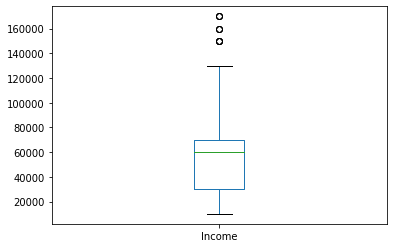

In [12]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(bikeBuyers,'Income') 

In [13]:
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    lst=df.index[(df[ft] < lower_boundary) | (df[ft] > upper_boundary)]
    return lst

In [14]:
outlierList=[]
for ft in ['Income']:
    outlierList.extend(outliers(bikeBuyers,ft))

In [15]:
outlierList=sorted(set(outlierList))
print(outlierList)
print("\ntotal number of outliers in four columns =",len(outlierList))

[6, 12, 43, 121, 178, 259, 321, 356, 829, 993]

total number of outliers in four columns = 10


In [16]:
bikeBuyers = bikeBuyers.drop(outlierList)
bikeBuyers.shape

(990, 13)

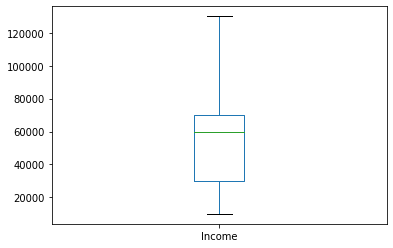

In [17]:
plot_boxplot(bikeBuyers,'Income') 

# Categorical Data

In [18]:
bikeBuyers['Marital Status'].unique()
bikeBuyers['Marital Status'].replace(to_replace='Married', value=0, inplace=True)
bikeBuyers['Marital Status'].replace(to_replace='Single', value=1, inplace=True)

In [19]:
bikeBuyers['Gender'].unique()
bikeBuyers['Gender'].replace(to_replace='Male', value=0, inplace=True)
bikeBuyers['Gender'].replace(to_replace='Female', value=1, inplace=True)

In [20]:
bikeBuyers = pd.get_dummies(bikeBuyers)
bikeBuyers.head()

,ID,Marital Status,Gender,Income,Children,Cars,Age,Education_Bachelors,Education_Graduate Degree,Education_High School,...,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific,Purchased Bike_No,Purchased Bike_Yes
0,12496,0,1,40000.0,1.0,0.0,42.0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,24107,0,0,30000.0,3.0,1.0,43.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,14177,0,0,80000.0,5.0,2.0,60.0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,24381,1,0,70000.0,0.0,1.0,41.0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4,25597,1,0,30000.0,0.0,0.0,36.0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
